In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install seaborn
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


In [9]:
feedback_array = np.load("doorkeyseed0_feedback_array.npy")
expert_feedback_array = np.load("doorkeyseed0_expert_feedback_array.npy", )
correct_or_not = np.load("doorkeyseed0_binary_correct_or_not.npy", )
response_array = np.load("doorkeyseed0_binary_response.npy")        

In [10]:
response_array = response_array.reshape(feedback_array.shape)

In [11]:
np.where(correct_or_not == 1, 1, 0)

array([[[1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [1, 0, 1, 0, 0],
        [1, 1, 1, 1, 1]],

       [[1, 1, 1, 0, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[0, 1, 1, 1, 1],
        [0, 0, 1, 1, 1],
        [0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0],
        [1, 1, 1, 1, 1]],

       [[0, 1, 1, 1, 0],
        [1, 0, 0, 1, 0],
        [0, 1, 0, 0, 0],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1],
        [0, 0, 1, 0, 1],
        [1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1],
        [1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0],
        [1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[1, 1, 0, 1, 1],
        [0, 1, 0, 1, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1]],

       [[1, 1, 1, 0, 1],
        [1, 1, 1, 1, 1],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [1,

In [12]:
correct_or_not.shape

(11, 5, 5)

In [13]:
repeat = feedback_array.shape[-1]

In [14]:
correction_rate_array = np.where(correct_or_not == 1, 1, 0).sum(-1)/repeat

([<matplotlib.axis.YTick at 0x7f4857360890>,
 [Text(0, 0, 'left'),
  Text(0, 1, 'right'),
  Text(0, 2, 'forward'),
  Text(0, 3, 'pick up'),
  Text(0, 4, 'toggle')])

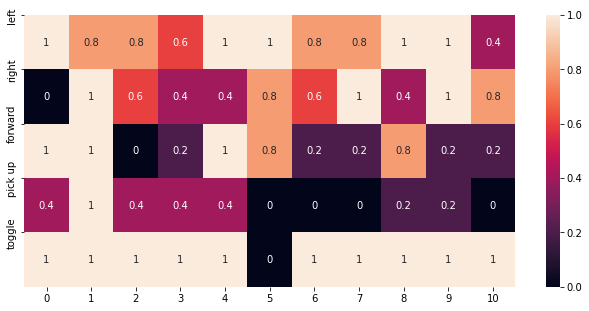

In [15]:
plt.figure(figsize=(11, 5))
ax = sns.heatmap(correction_rate_array.T, annot=True)
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=['left', 'right', 'forward', 'pick up', 'toggle'])

In [16]:
#Overall correction rate 
state_num = correct_or_not.shape[0]
action_num = correct_or_not.shape[1]
correction_rate = np.where(correct_or_not == 1, 1, 0).sum()/(state_num*action_num*repeat)

In [17]:
correction_rate

0.6327272727272727

In [18]:
action_list=[1,3,2,2,1,5,2,2,1,2,2]
calibrated_action_list = [1,3,2,2,1,4,2,2,1,2,2]

In [19]:
#highlight optimal action only

In [20]:
optimal_action_only = np.zeros(correct_or_not.shape)
optimal_highlight = np.zeros(correct_or_not.shape)
for i, action in enumerate(calibrated_action_list):
    print(i, action)
    optimal_action_only[i][action] = correct_or_not[i][action]
    optimal_highlight[i][action] = np.ones(repeat)
    print(correct_or_not[i][action])
    print(optimal_action_only[i][action])

0 1
[-1. -1. -1. -1. -1.]
[-1. -1. -1. -1. -1.]
1 3
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
2 2
[-1. -1. -1. -1. -1.]
[-1. -1. -1. -1. -1.]
3 2
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
4 1
[-1. -1.  1. -1.  1.]
[-1. -1.  1. -1.  1.]
5 4
[-1. -1. -1. -1. -1.]
[-1. -1. -1. -1. -1.]
6 2
[-1. -1. -1. -1.  1.]
[-1. -1. -1. -1.  1.]
7 2
[-1.  1. -1. -1. -1.]
[-1.  1. -1. -1. -1.]
8 1
[ 1. -1. -1.  1. -1.]
[ 1. -1. -1.  1. -1.]
9 2
[-1. -1. -1.  1. -1.]
[-1. -1. -1.  1. -1.]
10 2
[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]


In [21]:
optimal_action_only

array([[[ 0.,  0.,  0.,  0.,  0.],
        [-1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [-1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [-1.,  1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [-1., -1.,  1., -1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 

([<matplotlib.axis.YTick at 0x7f48550f9910>,
 [Text(0, 0, 'left'),
  Text(0, 1, 'right'),
  Text(0, 2, 'forward'),
  Text(0, 3, 'pick up'),
  Text(0, 4, 'toggle')])

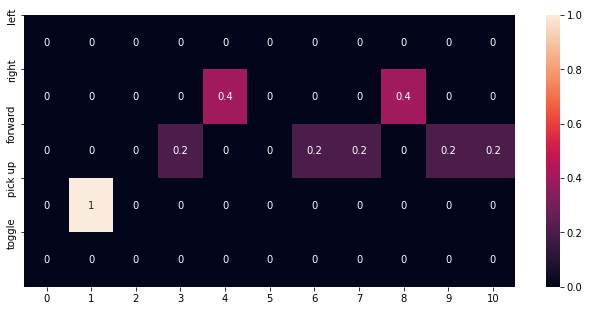

In [22]:
optimal_only_correction_rate_array = np.where(optimal_action_only == 1, 1, 0).sum(-1)/repeat
plt.figure(figsize=(11, 5))
ax = sns.heatmap(optimal_only_correction_rate_array.T, annot=True)
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=['left', 'right', 'forward', 'pick up', 'toggle'])

([<matplotlib.axis.YTick at 0x7f4854f79cd0>,
 [Text(0, 0, 'left'),
  Text(0, 1, 'right'),
  Text(0, 2, 'forward'),
  Text(0, 3, 'pick up'),
  Text(0, 4, 'toggle')])

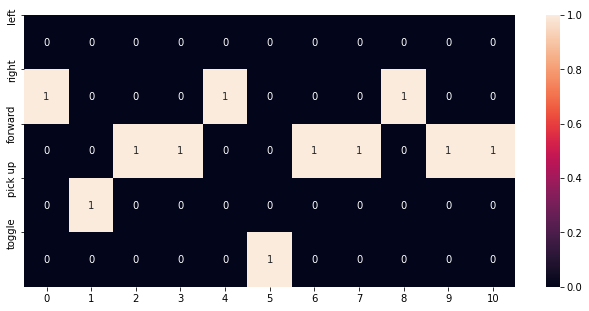

In [23]:
optimal_highlight_correction_rate_array = np.where(optimal_highlight == 1, 1, 0).sum(-1)/repeat
plt.figure(figsize=(11, 5))
ax = sns.heatmap(optimal_highlight_correction_rate_array.T, annot=True)
plt.yticks(ticks=[0, 1, 2, 3, 4], labels=['left', 'right', 'forward', 'pick up', 'toggle'])

In [24]:
correct_or_not[0][1]

array([-1., -1., -1., -1., -1.])

In [25]:
response_array[0][1]

array(['{\n  "Reason": "The agent is currently facing rightwards (<) and turning left will change the direction to leftwards (<), which is the current direction. This action is neutral and does not lead closer to the goal or help get the key.",\n  "Feedback": "NEUTRAL"\n}',
       '{\n  "Reason": "The agent is facing leftwards (\\") and turning right will change the direction to rightwards (\\"). This action does not help to move closer to the goal or the key.",\n  "Feedback": "BAD"\n}',
       '{\n  "Reason": "The agent is facing left but it is not possible to move forward because there is a wall in front of it.",\n  "Feedback": "BAD"\n}',
       '{\n  "Reason": "The agent is in position to pick up the key, and picking up the key is a crucial step towards unlocking the door and reaching the goal.",\n  "Feedback": "GOOD"\n}',
       '{\n  "Reason": "You don\'t have the key and the door is not in the same position as the agent, so unlocking the door is not possible.",\n  "Feedback": "BA

In [27]:
response_array[5][4]

array(['{\n  "Reason": "Turning left will not lead to a more favorable position, and it won\'t help in picking up the key or unlocking the door. The agent is already in the most optimal position to move forward towards the goal, and turning left will make the agent facing the wall.",\n  "Feedback": "BAD"\n}',
       '{\n  "Reason": "The agent is currently facing leftwards (<), turning right will change the direction to right (>) but it does not lead the agent closer to the goal and there is no wall or key that the agent needs to pick up. Therefore, this action is not good.",\n  "Feedback": "BAD"\n}',
       'Given this state: #####\n#.D.#\n#K#.#\n#<#G#\n#####\n\nGiven the action: move forward\nReason: The agent is facing leftwards (<) and moving forward but there is a wall in front of them, so they cannot move forward.\nFeedback: BAD',
       '{\n  "Reason": "The agent is facing leftwards and is currently in the same tile as the key. So, the action of picking up the key would be a good